# A Study of Segmenting and Classifying Handwriting Samples Using Convolutional Neural Networks

Tanner Wheeler and Ryan Barlow

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tensorflow as tf

import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Part 1: Characters
Using the [Digit and English Character Dataset](https://www.kaggle.com/datasets/swarupshah/digit-character)

In [ ]:
!curl -L -o ./characters.zip https://www.kaggle.com/api/v1/datasets/download/swarupshah/digit-character
!unzip characters.zip -d ./characters

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  252M  100  252M    0     0  86.0M      0  0:00:02  0:00:02 --:--:--  112M
Archive:  characters.zip
replace ./characters/digit_char_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./characters/digit_char_splited_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
data = pd.read_csv('characters/digit_char_dataset.csv')
# 28x28

In [ ]:
data = np.array(data)

y = data[:,784]
data = data[:,:784]

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=1)
del data

In [ ]:
# The first value in reshape should be should
# match the len(np.array) value.
print(len(X_train))
print(len(X_test))
X_train = X_train.reshape(331837, 28, 28, 1)
X_test = X_test.reshape(110613, 28, 28, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

331837
110613


#### Get the digit or character label

In [ ]:
def getLabel(num_label):
  if num_label <= 9:
    return str(num_label)
  elif num_label == 10:
    return "A"
  elif num_label == 11:
    return "B"
  elif num_label == 12:
    return "C"
  elif num_label == 13:
    return "D"
  elif num_label == 14:
    return "E"
  elif num_label == 15:
    return "F"
  elif num_label == 16:
    return "G"
  elif num_label == 17:
    return "H"
  elif num_label == 18:
    return "I"
  elif num_label == 19:
    return "J"
  elif num_label == 20:
    return "K"
  elif num_label == 21:
    return "L"
  elif num_label == 22:
    return "M"
  elif num_label == 23:
    return "N"
  elif num_label == 24:
    return "O"
  elif num_label == 25:
    return "P"
  elif num_label == 26:
    return "Q"
  elif num_label == 27:
    return "R"
  elif num_label == 28:
    return "S"
  elif num_label == 29:
    return "T"
  elif num_label == 30:
    return "U"
  elif num_label == 31:
    return "V"
  elif num_label == 32:
    return "W"
  elif num_label == 33:
    return "X"
  elif num_label == 34:
    return "Y"
  elif num_label == 35:
    return "Z"
  else:
    return "Invalid"

### Model

In [ ]:
model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(36, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
digit_history = model.fit(X_train, y_train, batch_size=256, epochs=20) ## batch_size of 128 or 256 seems to work best

Epoch 1/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8273 - loss: 0.6466
Epoch 2/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9627 - loss: 0.1347
Epoch 3/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9716 - loss: 0.1010
Epoch 4/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9759 - loss: 0.0839
Epoch 5/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9802 - loss: 0.0684
Epoch 6/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0571
Epoch 7/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0497
Epoch 8/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0426
Epoch 9/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0351
Epoch 10/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0312
Epoch 11/20
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9919 - loss: 0.0263
Epoch 12/20
1297/1297 ━━━━━━━━

#### Accuracy History

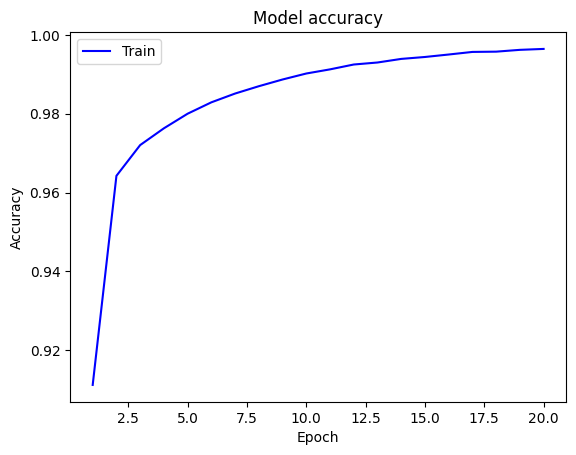

In [ ]:
plt.plot(range(1, 21), digit_history.history['accuracy'], 'b')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

#### Loss History

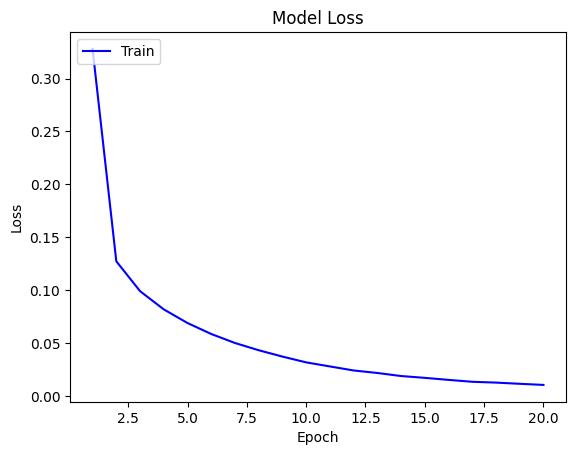

In [ ]:
plt.plot(range(1, 21), digit_history.history['loss'], 'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Training

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, epochs=10) ## batch_size of 128 or 256 seems to work best
model.summary()

Epoch 1/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0099
Epoch 2/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9974 - loss: 0.0078
Epoch 3/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9974 - loss: 0.0076
Epoch 4/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9973 - loss: 0.0077
Epoch 5/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9981 - loss: 0.0054
Epoch 6/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0063
Epoch 7/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0059
Epoch 8/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9982 - loss: 0.0055
Epoch 9/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9983 - loss: 0.0056
Epoch 10/10
1297/1297 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9983 - loss: 0.0054


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,091,950 (7.98 MB)

 Trainable params: 697,316 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,394,634 (5.32 MB)

### Evaluation with test data

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
prediction = model.predict(X_test).argmax(axis=1)
precision = precision_score(y_test, prediction, average='weighted')
recall = recall_score(y_test, prediction, average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')
print(f'Accuracy = {test_acc:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 = {f1:.4f}')

3457/3457 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9841 - loss: 0.1081
3457/3457 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Accuracy = 0.9847, Precision = 0.9847, Recall = 0.9847, F1 = 0.9846


#### Show Images with Real Labels and Predicted Labels

Test Image Example # 81644


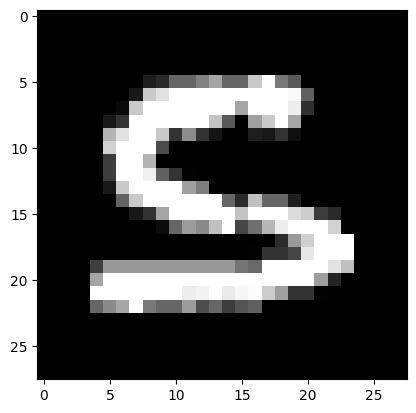

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted Class: 28 (S)
Actual Class: 28.0 (S)

Test Image Example # 33481


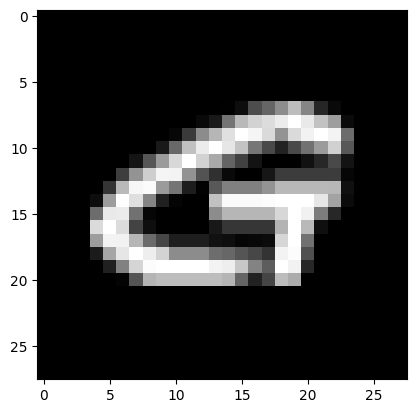

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 16 (G)
Actual Class: 16.0 (G)

Test Image Example # 97227


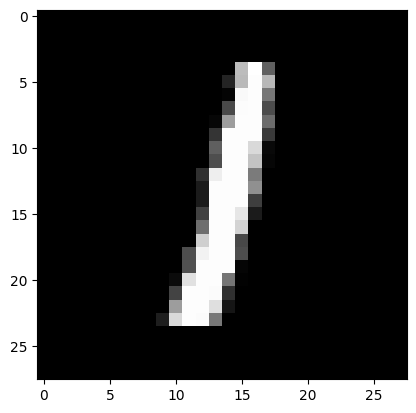

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: 1 (1)
Actual Class: 1.0 (1.0)

Test Image Example # 46993


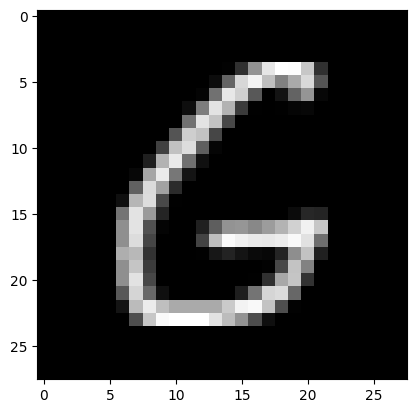

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 16 (G)
Actual Class: 16.0 (G)

Test Image Example # 104227


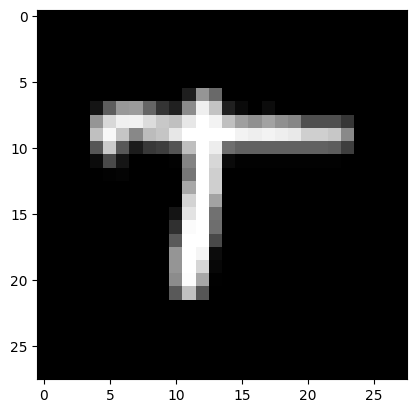

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 29 (T)
Actual Class: 29.0 (T)

Test Image Example # 90498


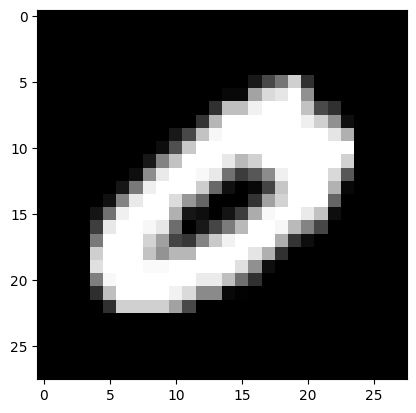

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 24 (O)
Actual Class: 24.0 (O)

Test Image Example # 110298


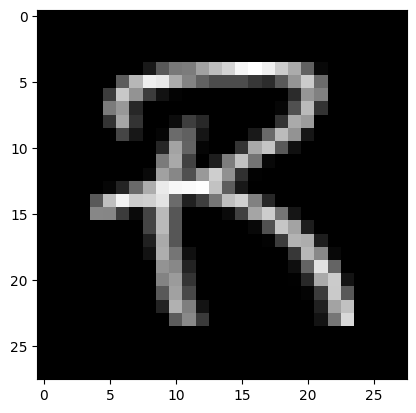

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 27 (R)
Actual Class: 27.0 (R)

Test Image Example # 96979


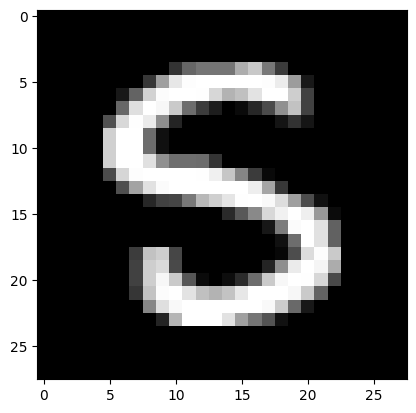

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 28 (S)
Actual Class: 28.0 (S)

Test Image Example # 85463


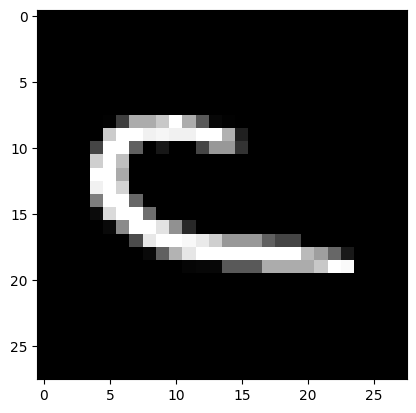

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 12 (C)
Actual Class: 12.0 (C)

Test Image Example # 69473


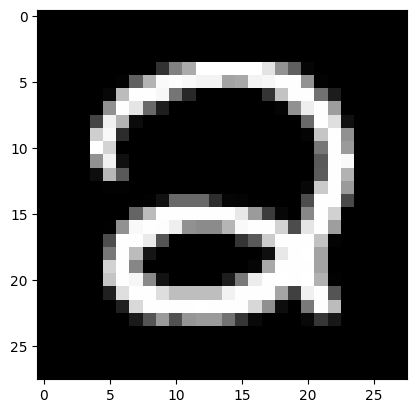

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 2 (2)
Actual Class: 2.0 (2.0)

Test Image Example # 3801


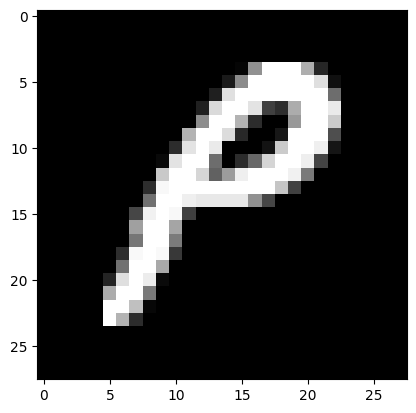

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 25 (P)
Actual Class: 25.0 (P)

Test Image Example # 110146


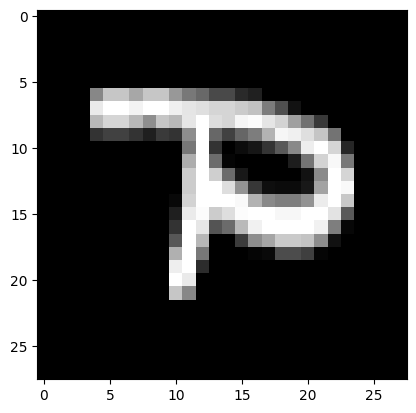

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 25 (P)
Actual Class: 25.0 (P)

Test Image Example # 61030


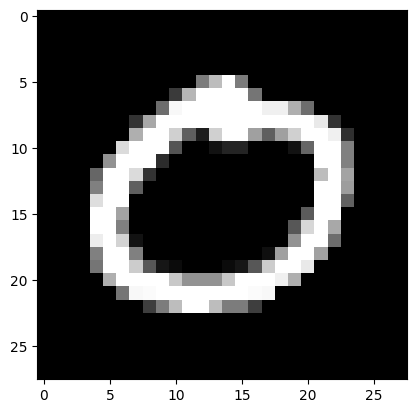

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: 24 (O)
Actual Class: 24.0 (O)

Test Image Example # 101706


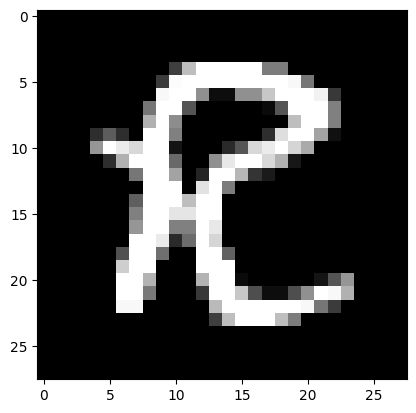

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 27 (R)
Actual Class: 27.0 (R)

Test Image Example # 32643


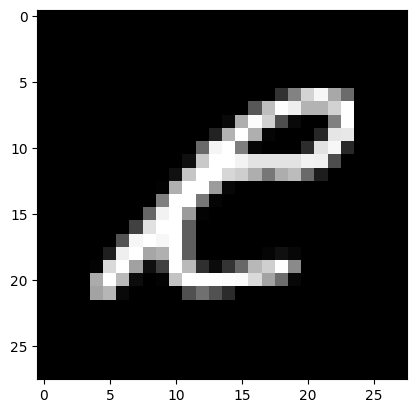

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 27 (R)
Actual Class: 27.0 (R)



In [ ]:
random.seed(5)
samples = random.sample(list(enumerate(X_test)), 15)

for position, _ in samples:
  print("Test Image Example #", position)
  first_image = np.array(X_test[position], dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

  position_label = np.argmax(model.predict(np.array([X_test[position]])))
  print("Predicted Class:", position_label, "(" + str(getLabel(position_label)) + ")")
  print("Actual Class:", y_test[position], "(" + str(getLabel(y_test[position])) + ")", end="\n\n")

# Part 2: Words
Using the [IAM Handwriting Word Database](https://www.kaggle.com/datasets/nibinv23/iam-handwriting-word-database).

This part of the project uses example code from Kaggle [here](https://www.kaggle.com/code/arshdeedyoyo/project-8) as a foundation of how this can be done. The CNN is our own.

In [ ]:
!curl -L -o ./words.zip https://www.kaggle.com/api/v1/datasets/download/nibinv23/iam-handwriting-word-database
!unzip words.zip -d ./words

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1129M  100 1129M    0     0   136M      0  0:00:08  0:00:08 --:--:--  187M
Archive:  words.zip
replace ./words/iam_words/words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./words/iam_words/words/a01/a01-000u/a01-000u-00-00.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./words/iam_words/words/a01/a01-000u/a01-000u-00-01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./words/iam_words/words/a01/a01-000u/a01-000u-00-02.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./words/iam_words/words/a01/a01-000u/a01-000u-00-03.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./words/iam_words/words/a01/a01-000u/a01-000u-00-04.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./words/iam_words/words/a01/a01-000u/a01-000u-00-05.pn

In [ ]:
# Using sample code from the Kaggle project
# https://www.kaggle.com/code/arshdeedyoyo/project-8

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))

    return dig_lst

def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    w, h = img.shape

    # Aspect Ratio Calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)

    img = np.expand_dims(img, axis=2)

    # Normalize
    img = img / 255

    return img

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78


In [ ]:
with open('words/words_new.txt') as f:
    contents = f.readlines()

lines = [line.strip() for line in contents][18:]
lines[0]

'a01-000u-00-00 ok 154 408 768 27 51 AT A'

In [ ]:
max_label_len = 0

images = []
labels = []
input_length = []
label_length = []
original_text = []

In [ ]:
for index, line in enumerate(lines):
    splits = line.split(' ')
    status = splits[1]

    if status == 'ok':
        word_id = splits[0]
        word = "".join(splits[8:])

        splits_id = word_id.split('-')
        filepath = 'words/iam_words/words/{}/{}-{}/{}.png'.format(
            splits_id[0], splits_id[0], splits_id[1], word_id)

        # process image
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        try:
            img = process_image(img)
        except:
            continue

        # process label
        try:
            label = encode_to_labels(word)
        except:
            continue

        images.append(img)
        labels.append(label)
        input_length.append(31) # Why do this if it's always 31???
        label_length.append(len(word))
        original_text.append(word)

        if len(word) > max_label_len:
            max_label_len = len(word)

In [ ]:
padded_labels = pad_sequences(labels, maxlen=max_label_len, padding='post', value=len(char_list))
padded_labels = np.array(padded_labels)

In [ ]:
# Perform a 60/20/20 split
random_state = 42
images_train, images_temp, padded_labels_train, padded_labels_temp, input_length_train, input_length_temp, label_length_train, label_length_temp, original_text_train, original_text_temp = train_test_split(
    images, padded_labels, input_length, label_length, original_text, test_size=0.4, random_state=random_state
)
images_val, images_test, padded_labels_val, padded_labels_test, input_length_val, input_length_test, label_length_val, label_length_test, original_text_val, original_text_test = train_test_split(
    images_temp, padded_labels_temp, input_length_temp, label_length_temp, original_text_temp, test_size=0.5, random_state=random_state
)

#### Using Categorical Crossentropy Loss

In [ ]:
# Label Output shape is 19
# The Output should be a list of 19 integers
model1 = Sequential([
  Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 128, 1)),
  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(256, (3,3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(512, (3,3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  keras.layers.Reshape((28, 512)),
  Bidirectional(LSTM(256, return_sequences=True)),
  Flatten(),
  Dense(19, activation='linear'),
  #keras.layers.Lambda(lambda x: tf.round(x)),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
word_history_ce = model1.fit(np.array(images_train), padded_labels_train, batch_size=1024, epochs=50, validation_data=(np.array(images_val), padded_labels_val))
model1.summary()

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.0396 - loss: 8895.0771 - val_accuracy: 0.0249 - val_loss: 8142.3032
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0237 - loss: 9794.5381 - val_accuracy: 0.0768 - val_loss: 17041.8457
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0856 - loss: 16525.4453 - val_accuracy: 0.1320 - val_loss: 5955.9155
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.1322 - loss: 13595.5850 - val_accuracy: 0.1320 - val_loss: 16687.8320
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.1268 - loss: 16685.6211 - val_accuracy: 0.1320 - val_loss: 16687.6934
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.1315 - loss: 16675.0176 - val_accuracy: 0.1320 - val_loss: 16687.6934
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.1326 - loss: 16685.1543 - val_accuracy: 0.1320 - val_loss: 16687.6934
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 32, 128, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 30, 126, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 15, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 13, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 30, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 28, 512)          │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 14, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 14336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_5 (Reshape)                  │ (None, 28, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 28, 512)             │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 14336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 19)                  │         272,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,191,419 (38.88 MB)

 Trainable params: 3,397,139 (12.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,794,280 (25.92 MB)

#### Accuracy History

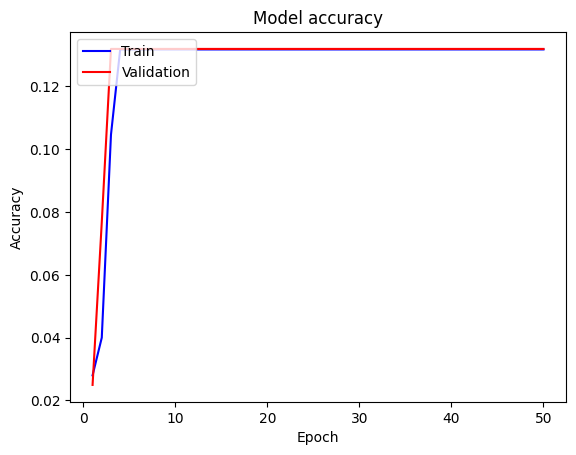

In [ ]:
plt.plot(range(1, 51), word_history_ce.history['accuracy'], 'b')
plt.plot(range(1, 51), word_history_ce.history['val_accuracy'], 'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Loss History

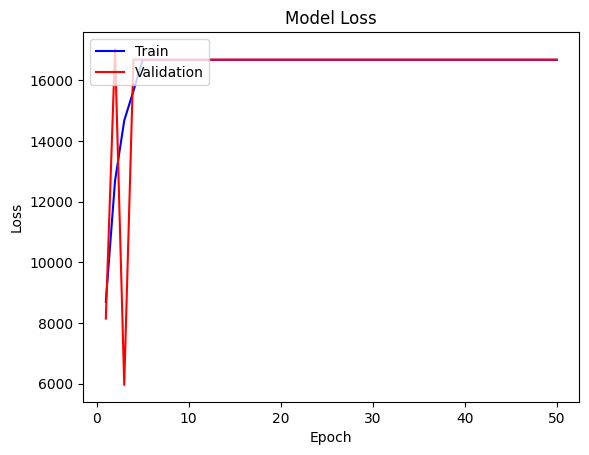

In [ ]:
plt.plot(range(1, 51), word_history_ce.history['loss'], 'b')
plt.plot(range(1, 51), word_history_ce.history['val_loss'], 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### View of the Predictions versus the Actual Values from Categorical Cross Entropy Loss

In [ ]:
temp = model1.predict(np.array(images_test)[1:2])
print(temp)
print(padded_labels_test[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[[  13.9852085   33.596336   -62.98541    -54.95037     23.336693
    28.78432     32.179123    22.614609  -102.32155     21.085999
    27.569723    20.863302   -57.79516     19.589397    30.161373
    21.577925    18.388618    22.005798  -102.98578  ]]
[70 71 69 66 65 58 56 69 78 78 78 78 78 78 78 78 78 78 78]


#### Using a Custom Loss

In [ ]:
def customloss(y_true, y_pred):
    diffs = y_true - y_pred
    diffs = abs(diffs)
    return diffs * 10**12

In [ ]:
# Label Output shape is 19
# The Output should be a list of 19 integers
model = Sequential([
  Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 128, 1)),
  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(256, (3,3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(512, (3,3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  keras.layers.Reshape((28, 512)),
  Bidirectional(LSTM(256, return_sequences=True)),
  Flatten(),
  Dense(19, activation='linear'),
  #keras.layers.Lambda(lambda x: tf.round(x)),
])

In [ ]:
model.compile(optimizer='adam', loss=customloss, metrics=['accuracy'])
word_history = model.fit(np.array(images_train), padded_labels_train, batch_size=1024, epochs=20, validation_data=(np.array(images_val), padded_labels_val))
model.summary()

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.0180 - loss: 45483342954496.0000 - val_accuracy: 3.9159e-04 - val_loss: 5781282357248.0000
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0178 - loss: 6216206516224.0000 - val_accuracy: 0.0680 - val_loss: 4747582504960.0000
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0198 - loss: 4362130685952.0000 - val_accuracy: 0.0021 - val_loss: 3756616318976.0000
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0141 - loss: 3926888284160.0000 - val_accuracy: 0.0072 - val_loss: 3862368354304.0000
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0085 - loss: 4026056310784.0000 - val_accuracy: 3.9159e-04 - val_loss: 3933602578432.0000
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.0212 - loss: 4158530781184.0000 - val_accuracy: 0.0000e+00 - val_loss: 4018105483264.0000
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0051 - lo

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 32, 128, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 30, 126, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 15, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 13, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 6, 30, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 4, 28, 512)          │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 2, 14, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 14336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 28, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 28, 512)             │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 14336)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 19)                  │         272,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,191,419 (38.88 MB)

 Trainable params: 3,397,139 (12.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,794,280 (25.92 MB)

#### Accuracy History

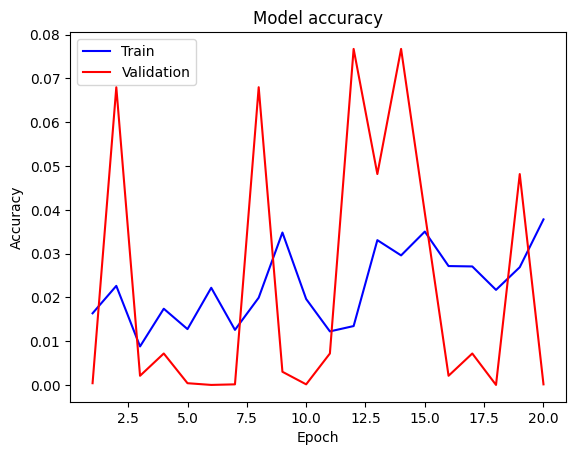

In [ ]:
plt.plot(range(1, 21), word_history.history['accuracy'], 'b')
plt.plot(range(1, 21), word_history.history['val_accuracy'], 'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Loss History

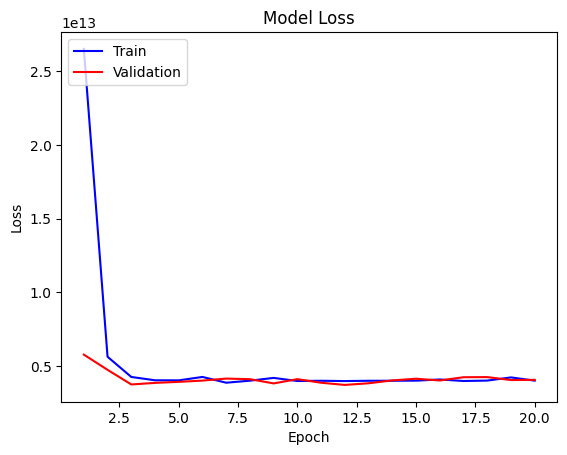

In [ ]:
plt.plot(range(1, 21), word_history.history['loss'], 'b')
plt.plot(range(1, 21), word_history.history['val_loss'], 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### View of the Predictions versus the Actual Values from Custom Loss

In [ ]:
temp = model.predict(np.array(images_test)[1:2])
print(temp)
print(padded_labels_test[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
[[59.93377  61.66837  66.68697  74.16465  78.0425   77.0002   75.344986
  72.374146 79.699165 75.38972  76.798965 76.89996  77.80151  76.74058
  78.17264  80.16111  76.385414 79.85811  77.844505]]
[70 71 69 66 65 58 56 69 78 78 78 78 78 78 78 78 78 78 78]


# Part 3: Lines (probably won't get this far)
Using the [IAM Handwriting Lines Database](https://fki.tic.heia-fr.ch/databases/download-the-iam-handwriting-database).
Since this data isn't publicly available, this dataset was stored in Google Drive.

In [ ]:
# Copy of the parsed lines dataset in the IAM Handwriting Database, stored in Google Drive
!pip install gdown
!gdown --id 1jtnISjWqAE7IGSdpaYUQpd_VmSYgKzKK -O lines.tgz
!mkdir ./lines
!tar -xzf ./lines.tgz -C ./lines

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jtnISjWqAE7IGSdpaYUQpd_VmSYgKzKK
From (redirected): https://drive.google.com/uc?id=1jtnISjWqAE7IGSdpaYUQpd_VmSYgKzKK&confirm=t&uuid=9c9ead0f-8092-4a0d-bb02-fbe6149c1f2e
To: /content/lines.tgz
100% 668M/668M [00:06<00:00, 105MB/s] 
mkdir: cannot create directory ‘./lines’: File exists
